# Example analysis of EXCEED-DM output

This notebook is an example of how to post-process the output of EXCEED-DM. Example output files can be found in the 'examples/<material name>/outputs' folder. Example larger datasets can be found here: https://doi.org/10.5281/zenodo.4737654

Current Examples:

- Plot the dark matter - electron scattering rate binned in energy

## Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# collection of useful functions for analysis
from exdm_analysis_tools import *

# Include this to make the 'fancy' plots
%run plotter.ipynb

## Files

In [11]:
# EXCEED-DM output paths
data_folder = 'C:/Users/Tanner/Desktop/electron_comparison_data/Si'

example_vc_data_file = data_folder+'/EXDMout_10x10x10_vc_large.hdf5'
example_vf_data_file = data_folder+'/EXDMout_10x10x10_vf_large_Z1.hdf5'
example_cc_data_file = data_folder+'/EXDMout_10x10x10_cc_large.hdf5'
example_cf_data_file = data_folder+'/EXDMout_10x10x10_cf_large_Z1.hdf5'

## Examples

### Dark matter - electron scattering rate, binned in energy

#### Load data

In [12]:
ex_dme_data_vc = DMEOutput(example_vc_data_file)
ex_dme_data_vf = DMEOutput(example_vf_data_file)
ex_dme_data_cc = DMEOutput(example_cc_data_file)
ex_dme_data_cf = DMEOutput(example_cf_data_file)

# dark matter mass in eV
mass = 10.**10
# mediator form factor, - d log FDM / d log q
f_pow = 0

# scattering rate, binned in energy

# v -> c transitions
ex_dR_E_vc = ex_dme_data_vc.get_binned_rate_E(mass, f_pow, ref_cs_cmet2 = 10**(-40), 
                                             bin_width = 10)

# v -> f transitions
ex_dR_E_vf = ex_dme_data_vf.get_binned_rate_E(mass, f_pow, ref_cs_cmet2 = 10**(-40), 
                                             bin_width = 10)

# c -> c transitions
ex_dR_E_cc = ex_dme_data_cc.get_binned_rate_E(mass, f_pow, ref_cs_cmet2 = 10**(-40), 
                                     bin_width = 10, 
                                     init_states = ex_dme_data_cc.get_core_init_states(
                                                 [1, 2], [0, 1]))
# c -> f transitions
ex_dR_E_cf = ex_dme_data_cf.get_binned_rate_E(mass, f_pow, ref_cs_cmet2 = 10**(-40), 
                                     bin_width = 10, 
                                     init_states = ex_dme_data_cf.get_core_init_states(
                                                 [1, 2], [0, 1]))
# print(ex_dR_E_vc[1, :])

#### Simple plot

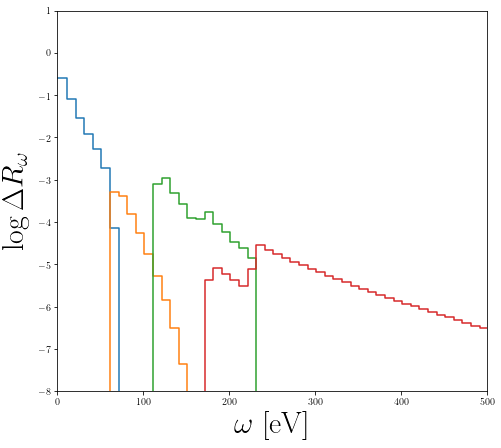

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=1, 
                             figsize=(7*1.1, 7))

axes.set_xlim(0, 500)
axes.set_ylim(-8, 1)

axes.set_ylabel(r'$\log \Delta R_\omega$', fontsize = 30)
axes.set_xlabel(r'$\omega \; [\mathrm{eV}]$', fontsize = 30)

axes.step(
    ex_dR_E_vc[0, :],
    np.log10(ex_dR_E_vc[1, :]),
    where = 'post'
)

axes.step(
    ex_dR_E_vf[0, :],
    np.log10(ex_dR_E_vf[1, :]),
    where = 'post'
)


axes.step(
    ex_dR_E_cc[0, :],
    np.log10(ex_dR_E_cc[1, :]),
    where = 'post'
)


axes.step(
    ex_dR_E_cf[0, :],
    np.log10(ex_dR_E_cf[1, :]),
    where = 'post'
)

plt.show()

#### Fancier plot

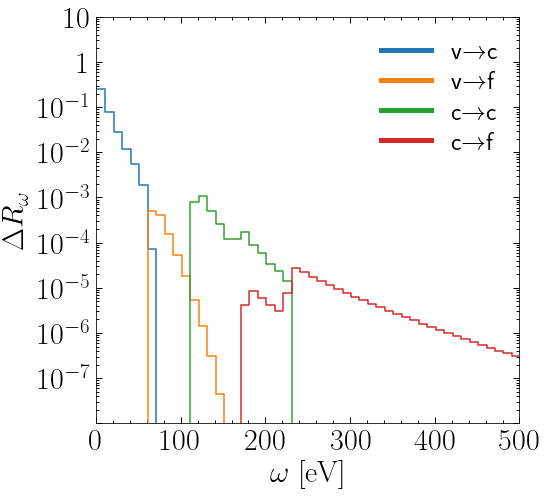

In [14]:
rc('text', usetex = True)

# save the figure?
save_fig = False
fig_filename = ''

fig, axes = plt.subplots(nrows=1, ncols=1, 
                             figsize=(7*1.1, 7))

axes.set_xlim(0, 500)
axes.set_ylim(-8, 1)

axes.set_ylabel(r'$\Delta R_\omega$', fontsize = 30)
axes.set_xlabel(r'$\omega \; [\mathrm{eV}]$', fontsize = 30)

set_custom_tick_options(axes)
axes.tick_params(axis='x', labelsize=30)
axes.xaxis.set_ticks(np.arange(0, 500 + 100, 100))
set_log_yticks(axes, -8, 1, show_first=False, step=1)

axes.step(
    ex_dR_E_vc[0, :],
    np.log10(ex_dR_E_vc[1, :]),
    where = 'post',
    label = r'v$\rightarrow$c'
)

axes.step(
    ex_dR_E_vf[0, :],
    np.log10(ex_dR_E_vf[1, :]),
    where = 'post',
    label = r'v$\rightarrow$f'
)


axes.step(
    ex_dR_E_cc[0, :],
    np.log10(ex_dR_E_cc[1, :]),
    where = 'post',
    label = r'c$\rightarrow$c'
)


axes.step(
    ex_dR_E_cf[0, :],
    np.log10(ex_dR_E_cf[1, :]),
    where = 'post',
    label = r'c$\rightarrow$f'
)

leg = axes.legend(fontsize=25, loc='upper right', labelspacing=0.25, edgecolor='white')
# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(5.0)
    
fig.tight_layout()

if save_fig:
        plt.savefig(
            fig_filename, 
            bbox_inches='tight', 
            pad_inches = 0.075)

plt.show()